In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"]=8,4
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv("D:\\Data Science\\Titanic\\train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.drop(["PassengerId","Name","Ticket","Cabin","Embarked"],axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [4]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


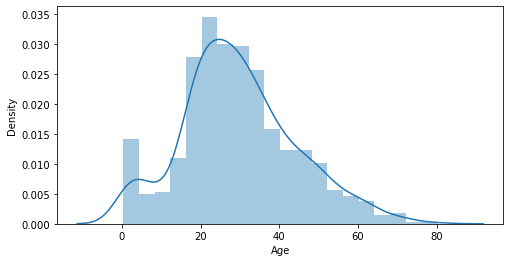

In [5]:
vis=sns.distplot(df["Age"])

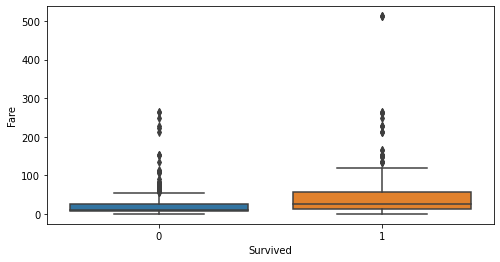

In [6]:
vis2=sns.boxplot(data=df,x="Survived",y="Fare")

In [7]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [8]:
df.fillna(df['Age'].median(),inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [9]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [10]:
sex_dummies=pd.get_dummies(df['Sex'],drop_first=True)
df=pd.concat([df,sex_dummies],axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,male
0,0,3,male,22.0,1,0,7.2500,1
1,1,1,female,38.0,1,0,71.2833,0
2,1,3,female,26.0,0,0,7.9250,0
3,1,1,female,35.0,1,0,53.1000,0
4,0,3,male,35.0,0,0,8.0500,1


In [11]:
df.drop(['Sex'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [12]:
from sklearn.preprocessing import StandardScaler
sts=StandardScaler()

In [13]:
feature_scale=['Age','Fare']
df[feature_scale]=sts.fit_transform(df[feature_scale])
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,-0.565736,1,0,-0.502445,1
1,1,1,0.663861,1,0,0.786845,0
2,1,3,-0.258337,0,0,-0.488854,0
3,1,1,0.433312,1,0,0.420730,0
4,0,3,0.433312,0,0,-0.486337,1


In [14]:
X=df.drop(['Survived'],axis=1)
y=df['Survived']

In [15]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [17]:

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [20]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.78888889 0.79775281 0.79775281 0.78651685 0.79775281 0.80898876
 0.78651685 0.83146067 0.7752809  0.80898876]


In [21]:
# kNN Score
round(np.mean(score)*100, 2)

79.8

In [22]:

clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.77777778 0.75280899 0.83146067 0.76404494 0.76404494 0.7752809
 0.76404494 0.76404494 0.74157303 0.75280899]


In [23]:
# decision tree Score
round(np.mean(score)*100, 2)

76.88

In [24]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.84444444 0.78651685 0.80898876 0.76404494 0.83146067 0.83146067
 0.79775281 0.78651685 0.82022472 0.7752809 ]


In [25]:

# Random Forest Score
round(np.mean(score)*100, 2)

80.47

In [26]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8        0.78651685 0.7752809  0.75280899 0.78651685 0.7752809
 0.7752809  0.82022472 0.79775281 0.80898876]


In [27]:

# Naive Bayes Score
round(np.mean(score)*100, 2)

78.79

In [28]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.79775281 0.80898876 0.82022472 0.85393258 0.80898876
 0.80898876 0.86516854 0.82022472 0.86516854]


In [29]:
round(np.mean(score)*100,2)

82.72

In [30]:
df2=pd.read_csv("D:\\Data Science\\Titanic\\test.csv")
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [31]:
df3=df2.drop(["PassengerId","Name","Ticket","Cabin","Embarked"],axis=1)
df3.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,34.5,0,0,7.8292
1,3,female,47.0,1,0,7.0000
2,2,male,62.0,0,0,9.6875
3,3,male,27.0,0,0,8.6625
4,3,female,22.0,1,1,12.2875


In [32]:
df3.isnull().sum()

Pclass     0
Sex        0
Age       86
SibSp      0
Parch      0
Fare       1
dtype: int64

In [33]:
df3['Age'].fillna(df3['Age'].median(),inplace=True)
df3['Fare'].fillna(df3['Fare'].median(),inplace=True)
df3.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,34.5,0,0,7.8292
1,3,female,47.0,1,0,7.0000
2,2,male,62.0,0,0,9.6875
3,3,male,27.0,0,0,8.6625
4,3,female,22.0,1,1,12.2875


In [34]:
df3.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [35]:
sex_dummies=pd.get_dummies(df3['Sex'],drop_first=True)
df3=pd.concat([df3,sex_dummies],axis=1)

In [36]:
df3.drop(['Sex'],axis=1,inplace=True)
df3.head()

,Pclass,Age,SibSp,Parch,Fare,male
0,3,34.5,0,0,7.8292,1
1,3,47.0,1,0,7.0000,0
2,2,62.0,0,0,9.6875,1
3,3,27.0,0,0,8.6625,1
4,3,22.0,1,1,12.2875,0


In [37]:
df3.head()

,Pclass,Age,SibSp,Parch,Fare,male
0,3,34.5,0,0,7.8292,1
1,3,47.0,1,0,7.0000,0
2,2,62.0,0,0,9.6875,1
3,3,27.0,0,0,8.6625,1
4,3,22.0,1,1,12.2875,0


In [38]:
df3[feature_scale]=sts.fit_transform(df3[feature_scale])

In [39]:
df3.head()

,Pclass,Age,SibSp,Parch,Fare,male
0,3,0.386231,0,0,-0.497413,1
1,3,1.371370,1,0,-0.512278,0
2,2,2.553537,0,0,-0.464100,1
3,3,-0.204852,0,0,-0.482475,1
4,3,-0.598908,1,1,-0.417492,0


Testing

In [40]:
clf = SVC()
clf.fit(X, y)

prediction = clf.predict(df3)

In [43]:

submission = pd.DataFrame({
        "PassengerId": df2["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('D:\\Data Science\\Titanic\\Titanicsubmission_V1_28022021.csv', index=False)